# Exploratory Data Analysis: Data Visualization

## Introduction

- Data visualization is an important component of Exploratory Data Analysis (EDA) because it allows a data analyst to “look at” their data and get to know the variables and relationships between them. 
- In order to choose and design a data visualization, it is important to consider two things:
    - The question you want to answer (and how many variables that question involves).
    - The data that is available. (is it quantitative or categorical?)
- In this article, we’ll use data visualization to explore a [dataset from StreetEasy](https://github.com/Codecademy/datasets/tree/master/streeteasy), which contains information about housing rentals in New York City. 
- The first few rows of the dataset are printed below (note that we have subsetted the original data for the purposes of this article):

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


rentals = pd.read_csv('streeteasy.csv')

rentals.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


## Univariate analysis

- Univariate analysis focuses on a single variable at a time. 
- Univariate data visualizations can help us answer questions like:
    - What is the typical price of a rental in New York City?
    - What proportion of NYC rentals have a gym?
- Depending on the type of variable (quantitative or categorical) we want to visualize, we need to use slightly different visualizations.

### Quantitative variables

- Box plots (or violin plots) and histograms are common choices for visually summarizing a quantitative variable. 
- These plots are useful because they simultaneously communicate information about minimum and maximum values, central location, and spread. 
- Histograms can additionally illuminate patterns that can impact an analysis (eg., skew or multimodality).

<br>

- **For example**: 
    - Suppose we are interested in learning more about the price of apartments in NYC. 
    - A good starting place is to plot a box plot of the `rent` variable. 
    - We could plot a boxplot of rent as follows:

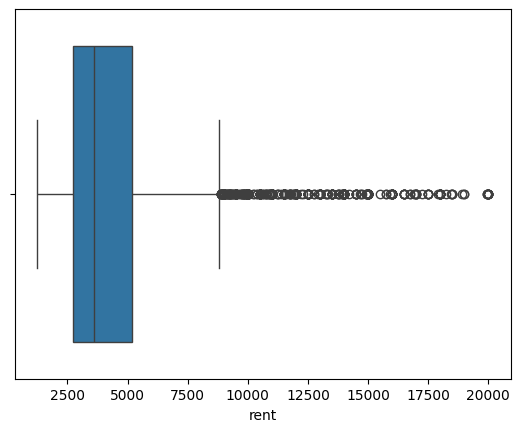

In [6]:
sns.boxplot(x='rent', data=rentals)
plt.show()

- We can see that most rental prices fall within a range of $2500-$5000; however, there are many outliers, particularly on the high end. 
- For more detail, we can also plot a histogram of the `rent` variable.

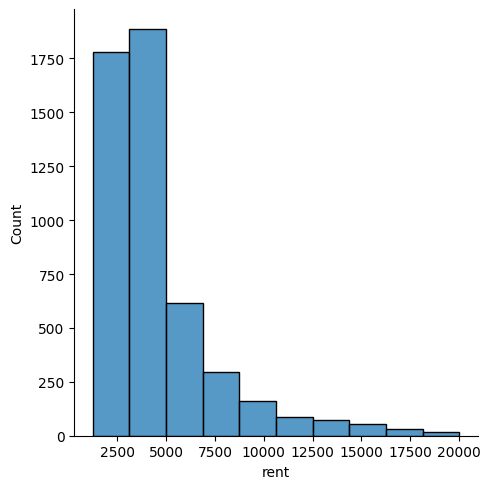

In [7]:
sns.displot(rentals.rent, bins=10, kde=False)
plt.show()

- The histogram highlights the long right-handed tail for rental prices. 
- We can get a more detailed look at this distribution by increasing the number of bins:

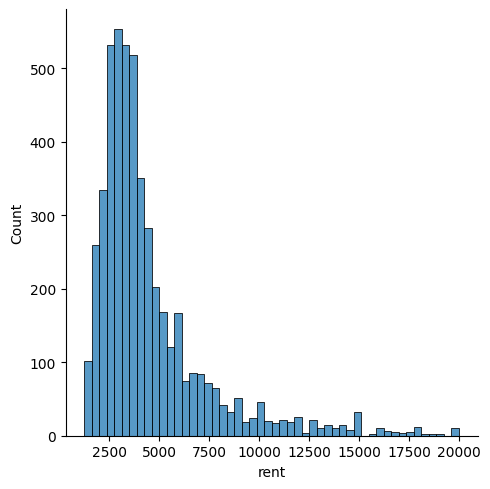

In [8]:
sns.displot(rentals.rent, bins=50, kde=False)
plt.show()

### Categorical variables

- For categorical variables, we can use a bar plot (instead of a histogram) to quickly visualize the frequency (or proportion) of values in each category. 

<br>

- **For example**: 
    - Suppose we want to know how many apartments are available in each borough.
    -  We can visually represent that information as follows:

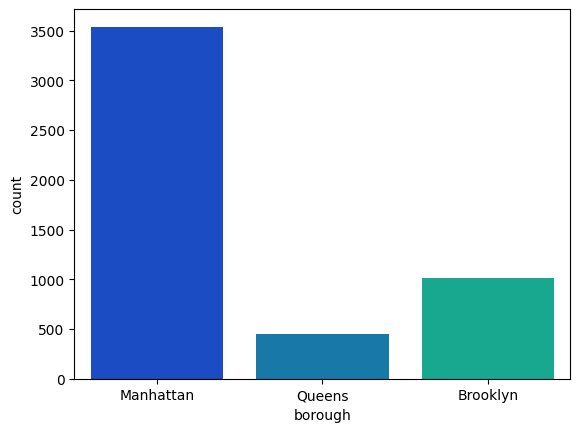

In [10]:
sns.countplot(x='borough', data=rentals, palette='winter', hue='borough')
plt.show()

- Alternatively, we could use a pie chart to communicate the same information:

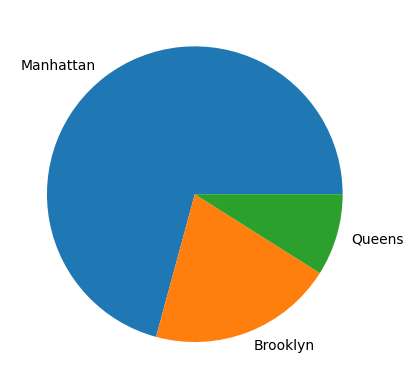

In [11]:
# Define the labels in pie chart
borough_labels = ["Manhattan", "Brooklyn", "Queens"]

# Generate pie chart of boroughs
plt.pie(rentals.borough.value_counts(), labels = borough_labels)
plt.show() 

- In general, many data analysts avoid pie charts because people are better at visually comparing areas of rectangles than wedges of a pie. 
- For a variable with a small number of categories (i.e., fewer than three), a pie chart is a reasonable choice; however, for more complex data, a bar chart is usually preferable.

## Bivariate analysis

- In many cases, a data analyst is interested in the relationship between two variables in a dataset. 
- **For example**:
    - Do apartments in different boroughs tend to cost different amounts?
    - What is the relationship between the area of an apartment and how much it costs?
- Depending on the types of variables we are interested in, we need to rely on different kinds of visualizations.

### One quantitative variable and one categorical variable

- Two good options for investigating the relationship between a quantitative variable and a categorical variable are side-by-side box plots and overlapping histograms.

<br>

- **For example**: 
    - Suppose we want to understand whether apartments in different boroughs cost different amounts. 
    - We could address this question by plotting side by side box plots of rent by borough:

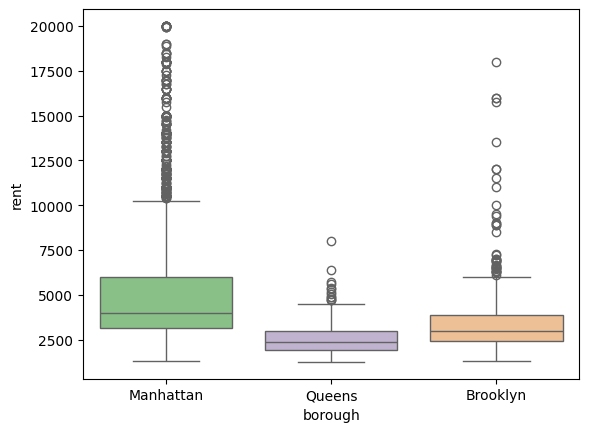

In [13]:
sns.boxplot(x='borough', y='rent', data=rentals, palette='Accent', hue='borough')
plt.show()

- This plot indicates that rental prices in Manhattan tend to be higher and have more variation than rental prices in other boroughs. 
- We could also investigate the same question in more detail by looking at overlapping histograms of rental prices by borough:

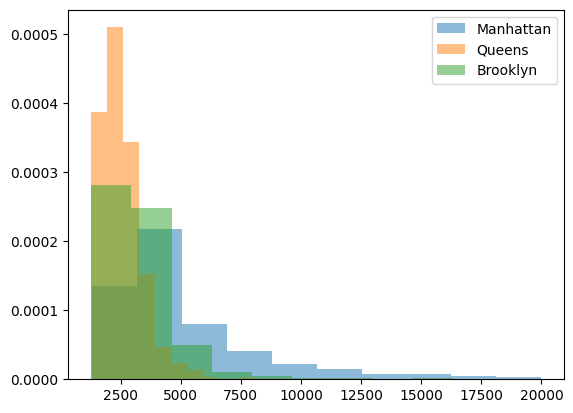

In [14]:
plt.hist(rentals.rent[rentals.borough=='Manhattan'], label='Manhattan', density=True, alpha=.5)
plt.hist(rentals.rent[rentals.borough=='Queens'], label='Queens', density=True, alpha=.5)
plt.hist(rentals.rent[rentals.borough=='Brooklyn'], label='Brooklyn', density=True, alpha=.5)
plt.legend()
plt.show()

- Using this visualization, we can see the long right-handed tail in rental prices, especially for Manhattan, and comparatively low prices in Queens.

### Two quantitative variables

- A scatter plot is a great option for investigating the relationship between two quantitative variables. 
- **For example**: 
    - If we want to explore the relationship between `rent` and `size_sqft`, we could create a scatter plot of these two variables:

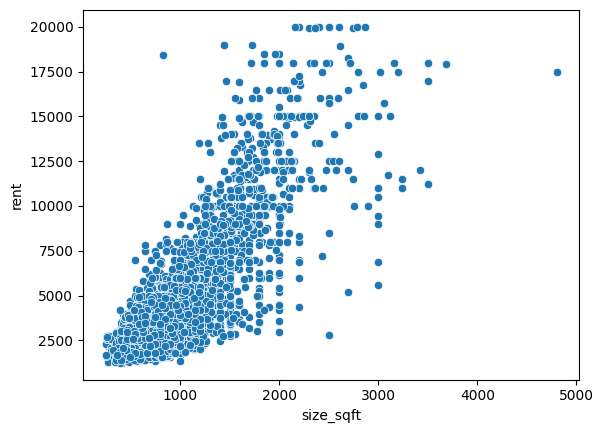

In [16]:
sns.scatterplot(x=rentals.size_sqft, y=rentals.rent)
plt.show()

- The plot indicates that there is a strong positive linear relationship between the cost to rent a property and its square footage. 
- Larger properties tend to cost more money.

### Two categorical variables

- Side by side (or stacked) bar plots are useful for visualizing the relationship between two categorical variables. 
- **For example**: 
    - Suppose we want to know whether rentals that have an elevator are more likely to have a gym. 
    - We could plot a side by side bar plot as follows:

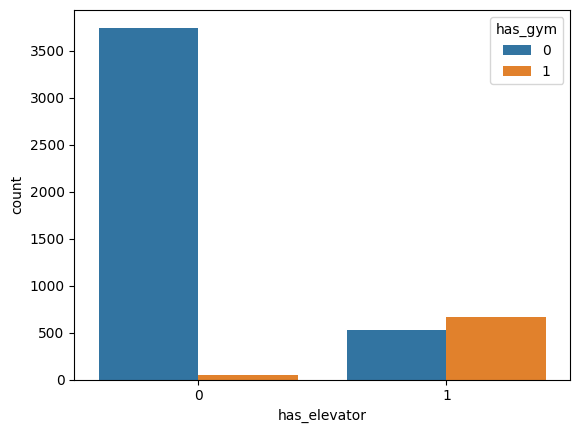

In [17]:
sns.countplot(x='has_elevator', hue='has_gym', data=rentals)
plt.show()

- This plot tells us that buildings with elevators are approximately equally likely to have a gym or not have a gym; meanwhile, apartments without elevators are very unlikely to have a gym.

## Multivariate analysis

- Sometimes, a data analyst is interested in simultaneously exploring the relationship between three or more variables in a single visualization. 
- Many of the visualization methods presented up to this point can include additional variables by using visual cues such as colors, shapes, and patterns. 
- **For example**: 
    - We can investigate the relationship between rental price, square footage, and borough by using color to introduce our third variable:

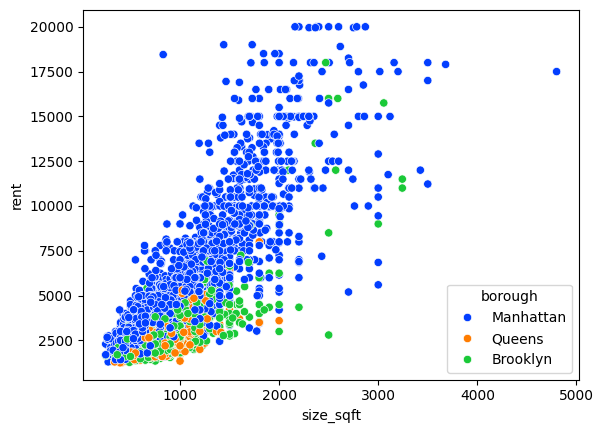

In [19]:
sns.scatterplot(x=rentals.size_sqft, y=rentals.rent, hue = rentals.borough, palette='bright')
plt.show()

- This plot shows many things at once: 
    - The positive linear relationship between price and area, the fact that Manhattan apartments tend to be larger than the other boroughs (because there are more blue points on the right-hand side of the plot compared to the other colors), and 
    - that Manhattan apartments tend to cost more money (because the blue points are mostly on top of the green and orange points).

<br>

- Even though it’s possible to add even more information to this plot (for example, we could use triangles and squares to indicate whether or not an apartment has a gym), it’s not always a good idea to overload a single visualization.

<br>

- Another common data visualization for multivariate analysis is a heat map of a correlation matrix for all quantitative variables:

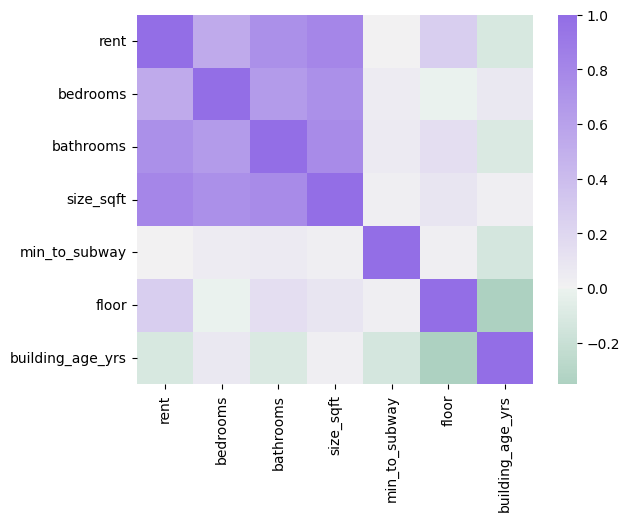

In [24]:
temp_df = rentals[["rent", "bedrooms", "bathrooms", "size_sqft", "min_to_subway", "floor", "building_age_yrs"]]

# Define the colormap which maps the data values to the color space defined with the diverging_palette method  
colors = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)

# Create heatmap using the .corr method on df, set colormap to cmap
sns.heatmap(temp_df.corr(), center=0, cmap=colors, robust=True)
plt.show()

- This heat map shows is that the rental price, number of bedrooms, number of bathrooms, and size of an apartment are all highly positively correlated (higher values of one are associated with higher values of the others). 
- Meanwhile, building age is weakly negatively correlated with rent, bathrooms, minutes to the subway, and floor (higher values of building age are associated with lower values of these other variables).